**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 3

In [470]:
import pandas as pd

In [471]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [472]:
train_x = train.drop("price", axis = 1) #created variables same with the first assignemnt.
train_y = train["price"]
median = train_x.median()

train_x_a = train_x.fillna(median)
price_null_index = train_y[train_y.isnull()].index
train_x_a.drop(price_null_index, inplace=True)
train_y.drop(price_null_index, inplace=True)

In [473]:
train_x_d = pd.get_dummies(train_x_a) #get the dummy variable as in the first assignment.
train_x_d.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,104.3,188.8,67.20,56.2,2410.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,1,0
1,94.5,170.2,63.80,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0
2,94.5,165.3,63.80,54.5,1938.0,110.0,3.15,3.29,9.4,69.0,...,0,0,0,0,1,0,0,0,0,0
3,104.5,187.8,66.50,54.1,2410.0,171.0,3.27,3.35,9.2,156.0,...,0,0,0,0,0,0,0,0,1,0
4,93.7,167.3,65.45,50.8,1989.0,90.0,2.97,3.23,9.4,68.0,...,0,0,0,0,1,0,0,0,0,0


In [474]:
from sklearn.preprocessing import StandardScaler

In [475]:
continuous_columns = [i for i in train_x_a if i not in  list(train_x_a.columns[train_x_a.dtypes == 'object'])]

sc = StandardScaler()
sc.fit(train_x_d[continuous_columns])# Only fit the scaler, not fit_transform. This is so we can use the same scaler for the test data.
train_x_e = train_x_d.copy()
train_x_e[continuous_columns] = sc.transform(train_x_d[continuous_columns])
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.106358,-0.204044,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,0,0,0,0,0,0,0,0,1,0
1,-0.729389,-0.266100,-1.003614,-0.087277,-0.969288,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,0,0,0,0,1,0,0,0,0,0


In [476]:
test_x = test.drop('price', axis=1) #we have the test set same with the first assignemnt
test_y = test['price']

In [477]:
test_x.fillna(median, inplace=True) #Use train median to fill test data

test_null_index = test_y.index[test_y.isnull()] #those steps on the test sets are same with the assignment 1.
test_x.drop(test_null_index, inplace=True)
test_y.drop(test_null_index, inplace=True)

In [478]:
test_x = pd.get_dummies(test_x)
test_x[continuous_columns] = sc.transform(test_x[continuous_columns])

## KNN REGGRESSOR TO PREDICT CAR PRICES 

### a) Training Vs Validation Plot:

In [479]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [480]:
train_split_x, val_split_x, train_split_y, val_split_y = train_test_split(train_x_e, train_y, test_size=0.2, random_state=0)
#By using train_test_split method, we splitted the train dataset into validation and train parts.

In [481]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [482]:
knn_training_errors = []
knn_validation_error = []
neighbors = list(range(1, 30)) 
#For every integer value k between 1 and 30 create and record a KNN Regression model’s training and validation MSEs 
#where the KNN model’s number of neighbours is k.
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_split_x, train_split_y) #fit the knn regressor model with splitted training set for each k.
    
    prediction_train = knn.predict(train_split_x) #predict for train set
    prediction_val = knn.predict(val_split_x) #predict for validation set
    
    mse_train = mean_squared_error( prediction_train, train_split_y) #calculate mean squared error for training set
    knn_training_errors.append(mse_train)
    mse_val = mean_squared_error(prediction_val,val_split_y) #calculate mean squared error for validation set
    knn_validation_error.append(mse_val)


In [483]:
import matplotlib.pyplot as plt

In [484]:
# training vs validation plot

Text(0, 0.5, 'Misclassification Error for Validation and Training')

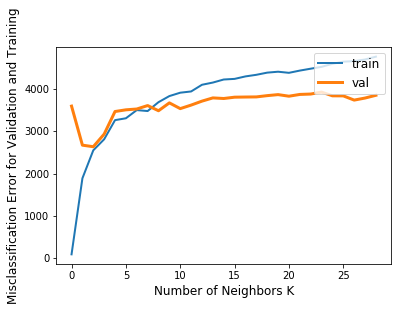

In [485]:
#Plot the training and validation error with two different code block, one of them is shown below.
plt.plot(np.sqrt(knn_training_errors), linewidth=2, label="train")
plt.plot(np.sqrt(knn_validation_error), linewidth=3, label="val") 
plt.legend(loc="upper right", fontsize=12)  
plt.xlabel("Number of Neighbors K", fontsize=12) 
plt.ylabel("Misclassification Error for Validation and Training", fontsize=12)  

Text(0, 0.5, 'Misclassification Error for Validation and Training')

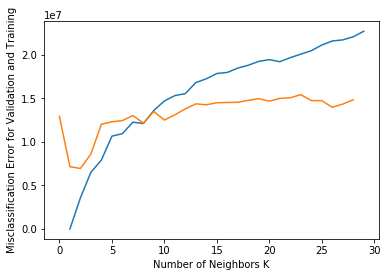

In [486]:
#Another plot example to represent training and validation error.
plt.plot(neighbors, knn_training_errors, knn_validation_error)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error for Validation and Training")

### b) Test your model:

In [487]:
#Get the best model with the minimum validation error.
bst_n_estimators = np.argmin(knn_validation_error)
bst_n_estimators

2

In [488]:
best_knn = KNeighborsRegressor(n_neighbors=2) #create new knn regressor model with best k value.
best_knn.fit(test_x, test_y) #fit new model by using test sets.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [489]:
#Make prediction with test set.
knn_preds = knn.predict(test_x)
knn_preds

array([16136.03448276,  8638.79310345, 19409.86206897, 22683.34482759,
       16623.34482759, 11538.31034483, 22981.93103448, 13556.75862069,
       18797.48275862, 15839.86206897, 15477.10344828,  8213.87931034,
        7977.24137931,  7038.        , 11072.89655172, 10986.93103448,
       17087.03448276, 15984.55172414, 15496.82758621,  7125.5862069 ,
        9048.06896552, 12466.5862069 , 11080.37931034, 10610.17241379,
       18617.13793103, 12451.4137931 ,  6874.        ,  8958.86206897,
        7289.17241379,  8030.62068966,  8977.75862069, 14592.06896552,
       21587.55172414,  7903.51724138,  7038.48275862,  7885.5862069 ,
        9752.89655172, 15403.65517241,  6918.86206897, 19578.89655172])

In [490]:
#calculate the mse for test set.
knn_mse = mean_squared_error(knn_preds, test_y)
print(knn_mse)

39120824.469366826


## DECISION TREE REGRESSOR TO PREDICT CAR PRICES

### c) Grid Search to find best model:

In [491]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [492]:
#define the parameters for the grid search.
params = {'max_depth':[None, 1, 5, 10], 'min_samples_split':[0.01, 0.05, 0.1, 0.3 ], 
        'max_leaf_nodes': [10, 50, 100, 250], 'max_features' : ['auto', 'sqrt', 'log2' ]}

In [493]:
#Create a Decision Tree Regressor model and use it on Grid Search to find best combination.
decision_tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=0) , params,verbose=1, cv = 5, scoring='neg_mean_squared_error')
decision_tree_grid.fit(train_x_e, train_y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 50, 100, 250],
                         'min

### d) Test your model:

In [494]:
#find the best model by using grid search.
decision_tree_grid.best_estimator_ 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                      max_leaf_nodes=50, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [495]:
#Create best model using the parameter that we found and fit it on the test sets.
best_tree = DecisionTreeRegressor( max_leaf_nodes=50, min_samples_split=0.1, min_samples_leaf=1)
best_tree.fit(test_x,test_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=50, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.1, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [496]:
#predict best tree model with test sets.
tree_preds = best_tree.predict(test_x)

In [497]:
#calculate mean squared error on test sets.
tree_mse = mean_squared_error(tree_preds, test_y)
print(tree_mse)

689896.9375


## ENSEMBLE BAGGING REGRESSOR TO PREDICT CAR PRICES

### e) Grid Search to find best model:

In [498]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [499]:
#Define parameters for the Bagging Regressor model to use in Grid Search.
param = {'base_estimator':[LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(random_state=0)] , 'n_estimators':[25, 50, 100, 250],
        'bootstrap_features':[False, True ]}

In [500]:
#Create BaggingRegressor model in GridSearchCV to find best combination.
bag_grid = GridSearchCV(BaggingRegressor(random_state = 0), param, verbose=1, cv = 5, scoring='neg_mean_squared_error')
bag_grid.fit(train_x_e,train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [LinearRegression(copy_X=True,
                                                             fit_interce...
                                                                  max_leaf_nodes=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_impurity_split=None,
                                                          

### f) Test your model:

In [501]:
#find the best estimator model in terms of bagging model.
bag_grid.best_estimator_

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=True, max_features=1.0,
                 max_samples=1.

In [502]:
#Create best bagging model using the parameters that we found above and fit this model on test sets.
best_bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators=25,bootstrap=True,max_features=1.0)
best_bag.fit(test_x,test_y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1

In [503]:
#Make prediction using test set.
bag_preds = best_bag.predict(test_x)

In [504]:
#Calculate the mean squared error of best bagging model.
bag_mse = mean_squared_error(bag_preds, test_y)
print(bag_mse)

3483396.6377599984


## RANDOM FOREST REGRESSOR TO PREDICT CAR PRICES

### g) Grid Search to find best model:

In [505]:
from sklearn.ensemble import RandomForestRegressor

In [506]:
#Define parameters for Random Forest Regressor.
paramf = {'n_estimators':[25, 50, 100, 250 ], 'max_depth':[None, 1, 5, 10 ]}

In [507]:
#Create RandomForestRegressor model and use it in GridSearchCv to find best combination.
random_forest_grid = GridSearchCV(RandomForestRegressor(random_state=0), paramf, verbose=1, cv = 5, scoring='neg_mean_squared_error')
random_forest_grid.fit(train_x_e, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [None, 1, 5, 10],
   

### h) Test your model:

In [508]:
#Find the best estimator model with parameters.
random_forest_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [509]:
#Create Random Forest Regressor model using parameters that we found above and fit them on test sets.
best_random_forest = RandomForestRegressor(n_estimators=250, oob_score=False, random_state=0)
best_random_forest.fit(test_x, test_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [510]:
#Make prediction with test set.
random_forest_preds = best_random_forest.predict(test_x)

In [511]:
#Calculate mean squared error.
random_forest_mse = mean_squared_error(random_forest_preds, test_y)
print(random_forest_mse)

2305726.9405217


### i) Feature Importances:

In [512]:
#Get the 3 most important features by finding max 3 features from best random forest model.
top_3_rf_features=[]
for features in np.sort(best_random_forest.feature_importances_)[-1:-4:-1]:
    top_3_rf_features.append(features)
print(top_3_rf_features)

[0.6566409626237941, 0.09948504489351767, 0.07099115609742605]
